
# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

In [1]:
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt
import math

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


##### Question 1: Is the distribution of body temperatures normal?
Answer: There are various statistical tests in existance that can tell, with some degree of certainty, whether a sample of data points was gathered from a probability distribution that is normally distributed. These are generally known as Normality tests [Wikipedia: Normality tests](https://en.wikipedia.org/wiki/Normality_test). I decided to use the Shapiro-Wilk test to analyze the provided data. The null hypothesis for the test is that the data points are being sampled from a normal distribution. The test returns a Shapiro-Wilk statistic, and a p-value. The p-value signifies the chance that the sample points could have been gathered from a normal distribution. Thus, if a p-value is small (let's call the significance level 5%), then we would reject the null hypothesis and say that the samples were not derived from a normal distribution.

In [3]:
(W, pvalue) = sp.shapiro(df['temperature'])
(W, pvalue)

(0.9865769743919373, 0.2331680953502655)

In this case, the p-value is greater than the level needed for rejection, so we unable to reject the null hypothesis. That is to say, we are unable to say that these points are not being sampled from a normal distribution. For good measure, we can also use another normality test based on D'Agostino and Pearson's test [Scipy Normaltest function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#r549). It again uses a null hypothesis that the data points are being sampled from a normal distribution.

In [4]:
(X, pvalue2) = sp.normaltest(df['temperature'])
(X, pvalue2)

(2.7038014333192031, 0.2587479863488254)

Again, the p-value is large enough that we are unable to reject the null hypothesis. It is possible, if not likely, that this distribution came from a normal distribution. We can also plot the distribution of our data to get a general feel of what it looks like.



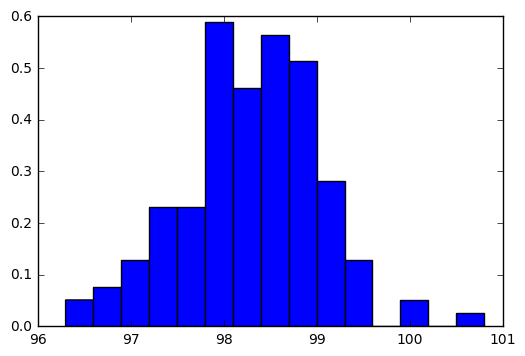

In [5]:
plt.hist(df['temperature'], normed=True, bins=15)
plt.show()

As expected, it has the general shape of a normally distributed curve. It is not particularly smooth, but this can be attributed to not having a plethora of data points. 

##### Question 2: Is the sample size large? Are the observations independent?

Answer: The sample is 'large' in the sense that it is large enough to use a Z-test, meaning we are able to assume that the sampling distribution of the sampling mean are approximately normally distributed. The 'rule of thumb' is that this assumption can be made with a sample size larger than 30.

#####  Question 3a.) Is the true population mean really 98.6 degrees F? 3b.) Would you use a one-sample or two-sample test? Why? 3c.) In this situation, is it appropriate to use the  t or  z  statistic? 3d.) Now try using the other test. How is the result be different? Why?

Answer 3a.): First, let's see what the mean of the sample is.

In [6]:
df['temperature'].mean()

98.24923076923078

This is certainly not 98.6, but it's possible that the mean of the underlying distribution could actually be 98.6, and that by chance we made a sample that had a mean of 98.25 instead. We can create a statistical test (specifically a Z-test) to test for this. Let's say that the null hypothesis is that the mean of the distribution is indeed 98.6, and that the alternate hypothesis is that it is not 98.6. Let's also define a threshold for rejection of the null hypothesis at 5%, meaning that if, given the null hypothesis, there was a 5% chance or less that we could have sampled data in the manner that we did, then we will reject the null hypothesis and declare that the mean of the distribution is unlikely to be 98.6. We will create a Z-statistic using the mean from our null hypothesis, the observed mean from our sample, and the observed standard deviation from our sample. We also want to create a two-tailed test, because we specifically care whether or not the average temperature is 98.6, not whether it is higher or lower than 98.6

Z = (Mean of underlying distribution - mean of sample) / (Standard deviation of sample / Square Root of Sample Count)

In [7]:
Z = (df['temperature'].mean() - 98.6) / (df['temperature'].std() / math.sqrt(130))
Z * -1

5.454823292364079

If we look this z-value up on a z-table, it's literally off the charts. It's highly unlikely that our sample distribution of points could have come from a normal distribution where the mean is 98.6 and the underlying sample has the standard deviation that it does. We can go further and calculate a confidence interval from our sample.

1.96 = (x - df['temperature'].mean()) / (df['temperature'].std() / math.sqrt(130))
1.96 * (df['temperature'].std() / math.sqrt(130)) = (x - df['temperature'].mean())
1.96 * (df['temperature'].std() / math.sqrt(130)) + df['temperature'].mean()) = x

In [8]:
1.96 * (df['temperature'].std() / math.sqrt(130)) + df['temperature'].mean()

98.37526742623304

In [9]:
(1.96 * (df['temperature'].std() / math.sqrt(130)) - df['temperature'].mean()) * -1

98.12319411222852

At this Z-score, we have confidence that there's a 95% chance that the actual mean of the distribution underlying the sample is between 98.12 and 98.38.

In [10]:
3.32 * (df['temperature'].std() / math.sqrt(130)) + df['temperature'].mean()

98.46272143313257

In [11]:
(3.32 * (df['temperature'].std() / math.sqrt(130)) - df['temperature'].mean()) * -1

98.03574010532898

Even calculating a 99.9% confidence interval gives us a range of 98.03 to 98.46. Therefore, it's very unlikely that the mean of the underlying distribution is actually 98.6.

Answer 3b: A one-sample test is appropriate here, because we are trying to determine make inferences about the underlying distribution (via a z-test) from a single sample. If we were trying to compare two samples and prove hypotheses surrounding statistics based on the samples (say, if the mean body temperature of men is the same as women), then we would use two-sample tests.

Answer 3c: As discussed above, in this situation it's appropriate to use a Z-statistic. When creating the Z-statistic, we make the  assumption that the standard deviation of the sampling distribution of the sample mean is equal to the standard deviation of our population divided by the square root of our sample size. We then make the assumption, as a result of the Central Limit Theorem, that the standard deviation of our population is equal to the standard deviation of our sample. The final result is a Z-statistic that we can assume is normally distributed. However, when the sample size is less than 30, then the statistic will not be normally distributed, and will instead take on a distribution known as the t-distribution. At this point, the t-statistic will be more appropriate to use.

Answer 3d: The statistic is calculated in the same way, it's just interpreted in a slightly different way by looking at a t-table instead of a z-table and by incorporating degrees of freedom into the calculation (in this case, 129, which is the sample size minus 1). For all practical purposes, the result is the same as the Z-test... That is to say, the chances of getting getting a sample like was gathered when the mean of the sampling distribution is 98.6 is extremely unlikely.

Answer 4: We already calculated a 95% and 99.9% confidence interval in the answer to 3a. The margin of error is simply the distance between the edge of the confidence interval and the sample mean. In the case of the 95% confidence interval, it's:
Z * sample standard deviation / Square root of the sample

In [12]:
1.96 * (df['temperature'].std() / math.sqrt(130))

0.12603665700226638

For the 99.9% confidence interval, it is the same equation with an updated Z-score:

In [13]:
3.32 * (df['temperature'].std() / math.sqrt(130))

0.21349066390179813

The high end of the 99.9% confidence interval is 98.46 degrees. It's safe to say that any temperature above that could be considered abnormal.


Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

Answer 5: First, let's calculate the mean of male and female temperatures within the sample.

In [14]:
# Female average temperature
df[df['gender']=='F']['temperature'].mean()

98.39384615384613

In [15]:
# Male average temperature
df[df['gender']=='M']['temperature'].mean()

98.1046153846154

At a glance, there does appear to be somewhat of a difference. However, let's use a hypothesis test to verify that this is indeed the case. Let's say that the null hypothesis is that male and female average temperatures are equal, or in other words, the mean of the sampling distribution of male temperatures minus the mean of the sampling distribution of female temperatures equals zero. The alternative hypothesis is that there is a difference. Also, let's calculate this hypothesis at a significance level of 5%. First, the mean of the difference of the male temperature distribution and female temperature distribution is simply equal to the mean of the male sampling distribution minus the mean of the female sampling distribution.

In [16]:
mean = df[df['gender']=='M']['temperature'].mean() - df[df['gender']=='F']['temperature'].mean()
mean

-0.289230769230727

Next, the standard deviation of the differences of the sample distributions of the sample means can be estimated with the the following formula:

In [17]:
stddev = math.sqrt((df[df['gender']=='M']['temperature'].std() * df[df['gender']=='M']['temperature'].std())/len(df[df['gender']=='M']) + (df[df['gender']=='F']['temperature'].std() * df[df['gender']=='F']['temperature'].std())/len(df[df['gender']=='F']))
stddev

0.12655395041982642

We can then see what Z-score is yielded when we use the standard Z-score calculation:

In [18]:
Zdiff = (0 - mean) / stddev
Zdiff

2.285434538165274

If we look at a Z-table, we will see that the Z-score for a two-tailed, 95% confidence interval is 1.96. The Z-score that we calculated is higher than that, so at the 5% significance level, we can reject the null hypothesis and conclude that there is indeed a difference between male and female average temperatures.

After examination of the data, it is clear that it is very unlikely that the mean normal body temperature is actually 98.6 degrees. Furthermore, there seems to be a significant difference between the body temperature level of men and women, so at the precision of 98.6 degrees, it may not even make sense to say that there is an average body temperature of people, but instead of men and women seperately.